In [1]:
# Inputs
import argparse
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

* https://stackoverflow.com/questions/68806265/huggingface-trainer-logging-train-data 

In [2]:
evalDict = pickle.load(open('subset-logs/eval_metrics_fifteen.pkl', 'rb'))

# accuracy, f1-weighed, f1
accuracies = []
f1w = []
f1 = []

fracs = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

for key in evalDict.keys():
    metrics = evalDict[key]
    accuracies.append(np.mean(metrics[0]))
    f1w.append(np.mean(metrics[1]))
    f1.append(np.mean(metrics[2]))

In [3]:
# Load and combine
evalDict2 = pickle.load(open('subset-logs/eval_metrics_fifteen-2.pkl', 'rb'))

# accuracy, f1-weighed, f1
accuraciesSub = []
f1wSub = []
f1Sub = []


for key in evalDict2.keys():
    metrics = evalDict2[key]
    accuraciesSub.append(np.mean(metrics[0]))
    f1wSub.append(np.mean(metrics[1]))
    f1Sub.append(np.mean(metrics[2]))

fracsSub = [0.001, 0.002, 0.003, 0.004, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075]

fracsFull = fracsSub + fracs
accuraciesFull = accuraciesSub + accuracies
f1Full = f1Sub + f1

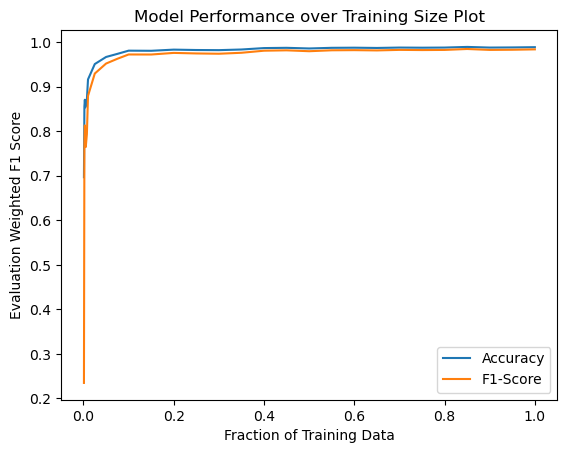

In [4]:
plt.plot(fracsFull, accuraciesFull, label = 'Accuracy')
plt.plot(fracsFull, f1Full, label = 'F1-Score')
plt.legend()
plt.xlabel("Fraction of Training Data")
plt.ylabel("Evaluation Weighted F1 Score")
plt.title("Model Performance over Training Size Plot")
plt.show()

# Load in Evals from Our Dataset

In [5]:
evalDict = pickle.load(open('subset-logs/eval_metrics-2.pkl', 'rb'))
fracs = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

# accuracy, f1-weighed, f1
accuracies = []
f1 = []

for key in evalDict.keys():
    metrics = evalDict[key]
    accuracies.append(np.mean(metrics[0]))
    f1.append(np.mean(metrics[2]))

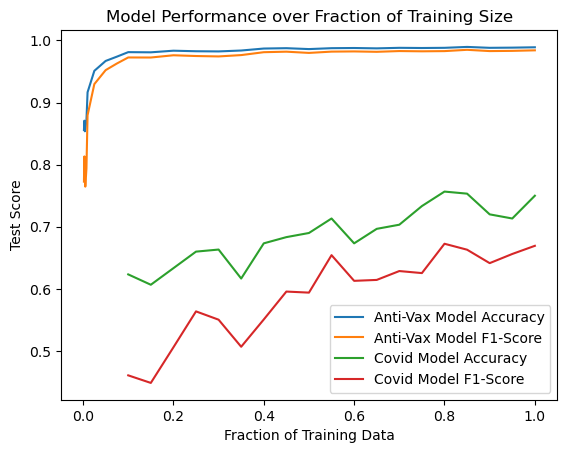

In [6]:
n = 1
plt.plot(fracsFull[n:], accuraciesFull[n:], label = 'Anti-Vax Model Accuracy')
plt.plot(fracsFull[n:], f1Full[n:], label = 'Anti-Vax Model F1-Score')

plt.plot(fracs, accuracies, label = 'Covid Model Accuracy')
plt.plot(fracs, f1, label = 'Covid Model F1-Score')

plt.legend()
plt.xlabel("Fraction of Training Data")
plt.ylabel("Test Score")
plt.title("Model Performance over Fraction of Training Size")
plt.savefig('figs/performance-fraction.png', dpi=300)
plt.show()

In [7]:
np.array(fracsFull)*11503

array([   11.503 ,    23.006 ,    34.509 ,    46.012 ,    57.515 ,
          86.2725,   115.03  ,   287.575 ,   575.15  ,   862.725 ,
        1150.3   ,  1725.45  ,  2300.6   ,  2875.75  ,  3450.9   ,
        4026.05  ,  4601.2   ,  5176.35  ,  5751.5   ,  6326.65  ,
        6901.8   ,  7476.95  ,  8052.1   ,  8627.25  ,  9202.4   ,
        9777.55  , 10352.7   , 10927.85  , 11503.    ])

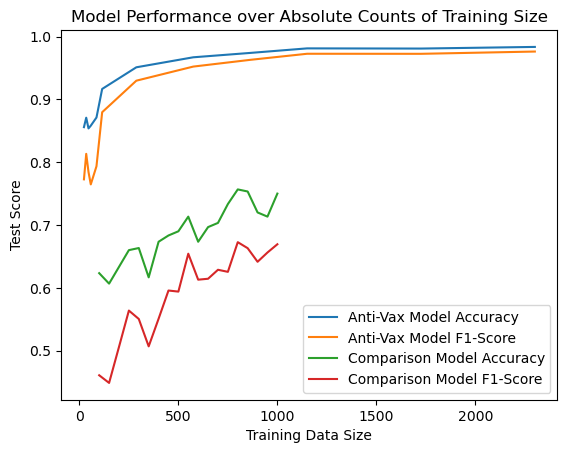

In [8]:
n = 1
m = 13
#m = -1
plt.plot(np.array(fracsFull[n:m])*11503, accuraciesFull[n:m], label = 'Anti-Vax Model Accuracy')
plt.plot(np.array(fracsFull[n:m])*11503, f1Full[n:m], label = 'Anti-Vax Model F1-Score')

plt.plot(np.array(fracs)*1000, accuracies, label = 'Comparison Model Accuracy')
plt.plot(np.array(fracs)*1000, f1, label = 'Comparison Model F1-Score')

plt.legend()
plt.xlabel("Training Data Size")
plt.ylabel("Test Score")
plt.title("Model Performance over Absolute Counts of Training Size")
#plt.savefig('figs/performance-count-2.png', dpi=300)
plt.savefig('figs/performance-count.png', dpi=300)
plt.show()

# Get top scores for the model 

In [19]:
(np.array(fracsFull)*11503)[:11]

array([  11.503 ,   23.006 ,   34.509 ,   46.012 ,   57.515 ,   86.2725,
        115.03  ,  287.575 ,  575.15  ,  862.725 , 1150.3   ])

In [20]:
print("Top Anti-Vax Accuracy: ", np.round(max(accuraciesFull),2))
print("Top Anti-Vax F1: ", np.round(max(f1Full),2))

print("Top Anti-Vax Accuracy w/ Train <1000: ", np.round(max(accuraciesFull[:11]),2))
print("Top Anti-Vax F1 w/ Train <1000: ", np.round(max(f1Full[:11]),2))

print("Top Comparison Accuracy: ", np.round(max(accuracies),2))
print("Top Comparison F1: ", np.round(max(f1),2))

Top Anti-Vax Accuracy:  0.99
Top Anti-Vax F1:  0.98
Top Anti-Vax Accuracy w/ Train <1000:  0.98
Top Anti-Vax F1 w/ Train <1000:  0.97
Top Comparison Accuracy:  0.76
Top Comparison F1:  0.67
